# Recurrent Neural Networks (RNNs)

## Introduction

Recurrent Neural Networks (RNNs) are designed to recognize patterns in sequences of data by having a form of memory. They process an input sequence $x = (x_1, x_2, ..., x_T)$ and produce an output sequence $y = (y_1, y_2, ..., y_T)$, utilizing the hidden states which carry information from previous steps. The mathematical statement for the model is represented as: 

$$
y_t = f(h_{t-1}, x_t)
$$

The RNN processes sequences by computing the hidden state $h_t$ at each time step $t$, which is a function of the current input $x_t$ and the previous hidden state $h_{t-1}$. This operation is essential for the RNN to carry information across time steps, allowing it to exhibit dynamic temporal behavior. The update of the hidden state can be described by the formula:

$$
h_t = g(h_{t-1}, x_t)
$$

The final goal for the RNN model is the find out the suitable $f$ and $g$ to predict $y_t$.

## Why RNNs

Recurrent Neural Networks (RNNs) are a class of neural networks designed specifically for processing sequential data. They are fundamental in fields where the sequence of data points is crucial, such as natural language processing (NLP), speech recognition, and time series prediction. Here are some reasons why RNNs are important:

1. **Handling Sequential Data**
    
    Unlike traditional neural networks that assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize the sequential nature of data, making them suitable for tasks like language modeling where the order of words is crucial.

2. **Memory Capability** 

    RNNs have a form of memory. They can remember information in the sequence they have processed, allowing them to use past insights to inform future outputs. This is particularly useful in tasks where context matters, such as predicting the next word in a sentence.

3. **Variable Length Input and Output**

    RNNs can handle inputs and outputs of varying lengths. This flexibility makes them ideal for applications like translation where the length of the input sequence (source language) might not match the length of the output sequence (target language).

4. **Applications in Time Series Prediction**

    RNNs are well-suited for predicting future values in a time series, such as stock prices or weather forecasts, by learning from the patterns in past data.
    
## Architecture

<p align="center">
<img src="photo//RNN/RNN.png" width="40%">
</p>

The core of an RNN's functionality is captured by the update of its hidden state $h_t$ at each time step $t$, which is a function of the current input $x_t$ and the previous hidden state $h_{t-1}$. This can be represented by the equation:

$$
h_t = f(W_{hh}h_{t-1} + W_{xh}x_t + b_h)
$$

Where:

- $f$ is a non-linear activation function, such as tanh or ReLU.
- $W_{hh}$ is the weight matrix for connections between hidden units from one time step to the next.
- $W_{xh}$ is the weight matrix for connections between input units and hidden units.
- $b_h$ is the bias term for the hidden units.

The output $y_t$ at each time step $t$ can then be computed as a function of the current hidden state $h_t$:

$$
y_t = g(W_{hy}h_t + b_y)
$$

Where:

- $g$ is a non-linear activation function or it could be a softmax function depends on what kind of problem we are dealing with.

## Problems

1. **Difficulty with Long-Term Dependencies** 

    Traditional RNNs struggle to learn long-range dependencies within a sequence due to vanishing and exploding gradient problems during backpropagation.

2. **Training Difficulties**

    Because of the sequential nature of RNNs, it can be more challenging and time-consuming to train these networks compared to feedforward neural networks. Parallel processing is also limited.

3. **Gradient Issues**

    RNNs are susceptible to vanishing and exploding gradients, which can hinder the learning of long-term dependencies. Advanced variants like LSTMs and GRUs were developed to address these issues, but they come with increased model complexity and computational cost.

    <p align="center">
    <img src="photo//RNN/RNN_gradient.png" width="30%">
    </p>
    
## Variants of RNNs

The following variants of RNNs imporved some shortage of tranditional RNNs.

### **Bidirectional RNN (BiRNN)**

A BiRNN consists of two RNNs stacked on top of each other. The first RNN moves forward through time beginning from the start of the sequence, while the second RNN moves backward through time starting from the end of the sequence. The outputs from the two RNNs are usually combined at each time step through concatenation, summing, or another operation to form a unified representation.

### Architecture

**Forward Pass**

For the forward direction, the hidden state at time $t$ is calculated as:

$$
\overrightarrow{h_t} = f(\overrightarrow{W_{hh}}\overrightarrow{h_{t-1}} + W_{xh}x_t + \overrightarrow{b_h})
$$

where:

- $f$ is a non-linear activation function
- $\overrightarrow{W_{hh}}$ is the weight matrix for the hidden layer in the forward direction
- $W_{xh}$ is the weight matrix for input-to-hidden layer connections
- $\overrightarrow{b_h}$ is the bias term for the forward hidden layer.

**Backward Pass**

For the backward direction, the hidden state at time $t$ is calculated as:

$$
\overleftarrow{h_t} = g(\overleftarrow{W_{hh}}\overleftarrow{h_{t+1}} + W_{xh}x_t + \overleftarrow{b_h})
$$

where:

- $g$ is potentially a different non-linear activation function
- $\overleftarrow{W_{hh}}$ is the weight matrix for the hidden layer in the backward direction
- $\overleftarrow{b_h}$ is the bias term for the backward hidden layer.

The final output at each time step $t$ can be a function of both forward and backward hidden states:
$$
y_t = h(\overrightarrow{h_t}, \overleftarrow{h_t})
$$

where $h$ is a function that combines the forward and backward hidden states, which could involve concatenation, addition, or another method of integration.

#### Adventage

**Enhanced Learning Capability**

The separate processing of sequences in forward and backward directions allows BiRNNs to mitigate some of the limitations of unidirectional RNNs, such as difficulty in accessing future context when making predictions.
    
### **Deep RNN (DRNN)**

Deep Recurrent Neural Networks (Deep RNNs) extend the concept of a basic RNN by adding multiple layers of RNN cells, creating a deeper architecture. This structure allows the network to learn complex patterns and hierarchies in sequential data, significantly enhancing its modeling capabilities beyond what a single layer RNN can achieve. The mathematical intuition behind Deep RNNs involves leveraging layered structures to process sequences at different levels of abstraction.

### Architecture

**First Layer**

For the first layer:

$$
h^{(1)}_t = f^{(1)}(W^{(1)}_{hh}h^{(1)}_{t-1} + W^{(1)}_{xh}x_t + b^{(1)}_h)
$$

where:

- $f^{(1)}$ is the activation function for the first layer
- $W^{(1)}_{hh}$ is the weight matrix for connections within the first layer
- $W^{(1)}_{xh}$ is the weight matrix for input-to-hidden connections in the first layer
- $b^{(1)}_h$ is the bias term for the first layer.

**Subsequent Layers**

For each additional layer $l > 1$:

$$
h^{(l)}_t = f^{(l)}(W^{(l)}_{hh}h^{(l)}_{t-1} + W^{(l)}_{xh}h^{(l-1)}_t + b^{(l)}_h)
$$

Where:

- $f^{(l)}$ is the activation function for the $l$th layer
- $W^{(l)}_{hh}$ and $W^{(l)}_{xh}$ are the weight matrices for the recurrent connections and the connections from the previous layer, respectively
- $b^{(l)}_h$ is the bias term for the $l$th layer.

The difference between the first layer and the subsequent layers lies in their inputs and how they interact with the data they process:

- **Input**: 

    The first layer takes the raw input sequence $x_t$ at each time step, while subsequent layers take the output of the previous layer $h^{(l-1)}_t$ as their input.

- **Role in Hierarchical Processing**: 

    The first layer is responsible for capturing initial patterns and dependencies directly from the input data. In contrast, subsequent layers work on higher levels of abstraction, refining and enhancing the representations created by layers before them.

#### Adventage

1. **Increased Model Capacity** 
    
    Adding depth to an RNN increases its capacity without a proportional increase in the number of parameters per layer, potentially leading to more efficient learning.

2. **Enhanced Learning Capability**
    
    Deep RNNs can learn complex features at various levels of abstraction. The first layer might capture basic patterns, while subsequent layers can learn to interpret these patterns in a more abstract and sophisticated manner. This hierarchical learning is particularly useful in complex sequential tasks like language understanding and speech recognition.
    


### Model Construction

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
class DRNN(nn.Module):

    def __init__(self, input_size, hidden_size, num_layers, output_size,batch_size,window_size, lr=0.00005):
        super(DRNN, self).__init__()
        self.hidden_size = hidden_size
        self.batch_size = batch_size
        self.window_size = window_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers,batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
        self.lr = lr
        
    def forward(self, x):
        # Initialize hidden and cell states
        if len(x.size()) == 3:
            h0 = torch.zeros( self.num_layers,x.size()[0] , self.hidden_size)
        else:
            h0 = torch.zeros( self.num_layers , self.hidden_size)
        # Forward propagate RNN
        out, _ = self.rnn(x, h0.detach())
        # Decode the hidden state 
        if len(x.size()) == 3:
            out = self.fc1(out[:,-1])
        else:
            out = self.fc1(out[-1])
        return out

# Model initialization
input_size = 1
hidden_size = 25 # Number of features in hidden state
num_layers = 3 # Number of stacked RNN layers
output_size = 1 # Number of output predictions
batch_size = 128
window_size = 30

model_DRNN = DRNN(input_size, hidden_size, num_layers, output_size, batch_size, window_size)

# Long Short-Term Memory (LSTM)

## Introduction

Long Short-Term Memory (LSTM) networks, a specialized subclass of Recurrent Neural Networks (RNN), excel at learning long-term dependencies within sequential data. Developed by Hochreiter & Schmidhuber in 1997, LSTMs were designed to overcome the vanishing gradient issue that plagues traditional RNNs. This challenge impedes RNNs' capacity to retain information from earlier in the sequence for extended periods, thus constraining their efficiency in processing lengthy sequences.

## Why LSTM

1. **Overcoming the Vanishing Gradient Problem**

    **Issue**
    
    In standard RNNs, gradients can either vanish or explode during backpropagation, especially in long sequences. This makes it difficult for the network to learn long-term dependencies because the information from earlier time steps gets lost, or the weights get updated too drastically.

    **Solution**
    
    LSTMs introduce a memory cell that can maintain information for long periods and gates that regulate the flow of information into and out of the cell, effectively addressing the vanishing gradient problem.

2. **Learning Long-term Dependencies**

    **Issue**
    
    Traditional RNNs struggle to learn long-range dependencies within a sequence due to vanishing and exploding gradient problems during backpropagation.

    **Solution**
    
    LSTMs are specifically designed to remember information for long durations, enabling them to capture relationships between elements in the sequence that are separated by large gaps.

## Architecture

<p align="center">
<img src="photo/RNN/LSTM1.png" width="40%">
</p>

For each time step $t$, there are 3 inputs in hidden layer, input data ${\bf x}_t$ previous output $h_{t-1}$, and the cell memory $C_{t-1}$

**Forget Gate**

The forget gate decides which information should be thrown away or kept. The equation for the forget gate $f_t$ is:

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

**Input Gate**

The input gate decides which new information is added to the cell state. It involves two parts: one sigmoid layer to decide which values we'll update, and a tanh layer to create a vector of new candidate values. The equations are:

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

**Cell State Update**

The cell state is updated by forgetting the things we decided to forget earlier, then adding scaled new information. The update equation is:
$$
C_t = f_t \ast C_{t-1} + i_t \ast \tilde{C}_t
$$

**Output Gate**

The output gate decides what the next hidden state should be. The hidden state $h_t$ contains information about the previous input, and the equation for the output gate $o_t$ and hidden state $h_t$ update are:

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t \ast \tanh(C_t)
$$

In these equations:

- $\sigma$ denotes the sigmoid function, which outputs a number between 0 and 1.
- $W$ terms represent weight matrices (e.g., $W_f$, $W_i$, $W_C$, $W_o$) that are learned during training.
- $b$ terms represent bias vectors (e.g., $b_f$, $b_i$, $b_C$, $b_o$) that are also learned during training.
- $[h_{t-1}, x_t]$ denotes the concatenation of the previous hidden state and the current input.
- $C_t$ represents the current cell state.
- $h_t$ represents the current hidden state.
- $f_t$, $i_t$, and $o_t$ represent the forget gate, input gate, and output gate activations, respectively.
- $\tilde{C}_t$ represents the candidate values for the state update.




### Model Construction

In [3]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim,batch_size=batch_size,window_size=window_size, lr=0.0001):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.window_size = window_size
        self.num_layers = num_layers
        # Define the LSTM layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers,batch_first=True)
        # Define the output layer
        self.linear1 = nn.Linear(hidden_dim, output_dim)
        self.lr = lr
        
    def forward(self, x):
        # Initialize hidden state and cell state
        if len(x.size()) == 3:
            h0 = torch.zeros(self.num_layers,x.size()[0], self.hidden_dim)
            c0 = torch.zeros(self.num_layers,x.size()[0], self.hidden_dim)
        else:
            h0 = torch.zeros(self.num_layers, self.hidden_dim)
            c0 = torch.zeros(self.num_layers, self.hidden_dim)
        # Forward propagate LSTM
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        # Select the last time step's output for prediction
        if len(x.size()) == 3:
            out = self.linear1(out[:,-1])
        else:
            out = self.linear1(out[-1])
        return out

# Model parameters
input_dim = 1  # number of features
hidden_dim = 25  # can be adjusted
num_layers = 3  # number of LSTM layers
output_dim = 1  # for regression; for classification, this might be the number of classes
batch_size = 128
window_size = 30

# Initialize the model, loss function, and optimizer
model_LSTM = LSTM(input_dim, hidden_dim, num_layers, output_dim, batch_size, window_size)

# Gated Recurrent Unit (GRU)

## Introduction

The Gated Recurrent Unit (GRU) is a type of recurrent neural network (RNN) architecture that aims to solve the vanishing gradient problem associated with traditional RNNs. GRUs achieve this by introducing gating units that regulate the flow of information between cells in the network. These gates help the model to capture dependencies over various time scales and to effectively remember and forget information, making GRUs particularly adept at processing sequences of data for tasks such as language modeling and time series prediction.

## Why GRU

1. **Simplification and Efficiency**

    Compared to its counterpart, the Long Short-Term Memory (LSTM) unit, which has three gates, the GRU's structure is simpler with only two gates. This simplification can lead to more efficient computation in practice while retaining the ability to model complex temporal dynamics.

## Architecture

<p align="center">
<img src="photo/RNN/GRU.png" width="40%">
</p>

For each time step $t$, the GRU updates its hidden state $h_t$ using the following equations:

**Update Gate**:

The update gate $z_t$ decides how much of the past information (from previous time steps) needs to be passed along to the future.

$$
z_t = \sigma(W_z x_t + U_z h_{t-1} + b_z)
$$

**Reset Gate**:

The reset gate $r_t$ determines how much of the past information to forget.

$$
r_t = \sigma(W_r x_t + U_r h_{t-1} + b_r)
$$

**Candidate Hidden State**:

This is a combination of the current input $x_t$ and the weighted past hidden state $h_{t-1}$, modulated by the reset gate. The symbol $\odot$ denotes element-wise multiplication.

$$
\tilde{h}_t = \tanh(W x_t + U(r_t \odot h_{t-1}) + b_h)
$$

**Final Hidden State**:

The hidden state $h_t$ is the weighted sum of the previous hidden state $h_{t-1}$ and the candidate hidden state $\tilde{h}_t$, with weights given by the update gate $z_t$. This allows the GRU to balance between the information it keeps from the past and the new information it adds from the current input.

$$
h_t = z_t \odot h_{t-1} + (1 - z_t) \odot \tilde{h}_t
$$

In these equation:

- $x_t$ represents the input vector.
- $h_t$ represents the hidden state vector.
- $z_t$ represents the update gate.
- $r_t$ represents the reset gate.
- $\tilde{h}_t$ represents the candidate hidden state.
- $W_z, W_r, W$: Weight matrices associated with the input vector $x_t$ for the update gate, reset gate, and candidate hidden state, respectively.
- $U_z, U_r, U$: Weight matrices associated with the previous hidden state $h_{t-1}$ for the update gate, reset gate, and candidate hidden state, respectively.
- $b_z, b_r, b_h$: Bias vectors for the update gate, reset gate, and candidate hidden state, respectively.
- $\sigma$ represents the sigmoid activation function.
- $\tanh$ The hyperbolic tangent activation function.
- $\odot$ Element-wise multiplication operation.

### Model Construction

In [4]:
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,batch_size=batch_size,window_size=window_size, lr=0.0001):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.batch_size = batch_size
        self.window_size = window_size
        self.num_layers = num_layers
        # GRU Layer
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        # Fully connected layer
        self.fc1 = nn.Linear(hidden_dim, output_dim)
        self.lr = lr
        
    def forward(self, x):
        # Initialize hidden state with zeros
        if len(x.size()) == 3:
            h0 = torch.zeros(self.num_layers,x.size()[0], self.hidden_dim)
        else:
            h0 = torch.zeros(self.num_layers, self.hidden_dim)
        # Forward propagate GRU
        out, _ = self.gru(x, h0.detach())
        # Decode the hidden state of the last time step
        if len(x.size()) == 3:
            out = self.fc1(out[:,-1])
        else:
            out = self.fc1(out[-1])
        return out

# Hyperparameters
input_dim = 1  
hidden_dim = 25  # Number of hidden layers.
num_layers = 3  # Number of GRU layers. This can be adjusted according to the complexity of the task.
output_dim = 1
batch_size = 128
window_size = 30

# Create the model
model_GRU = GRU(input_dim, hidden_dim, output_dim, num_layers, batch_size, window_size)

## Example: Stock Price Prediction

In this example, we employ the historical returns of a stock to forecast its future performance. Specifically, we select "Netflix" (NFLX) as our focus. The most recent 360 days serve as our dataset for training. We apply the rolling window technique, setting the window size to 270 days and moving forward in increments of 30 days. Ultimately, our prediction model uses data from the preceding 210 days (270 - 60) to forecast the returns for the following 60 days.

### Data Details

[*********************100%***********************]  1 of 1 completed


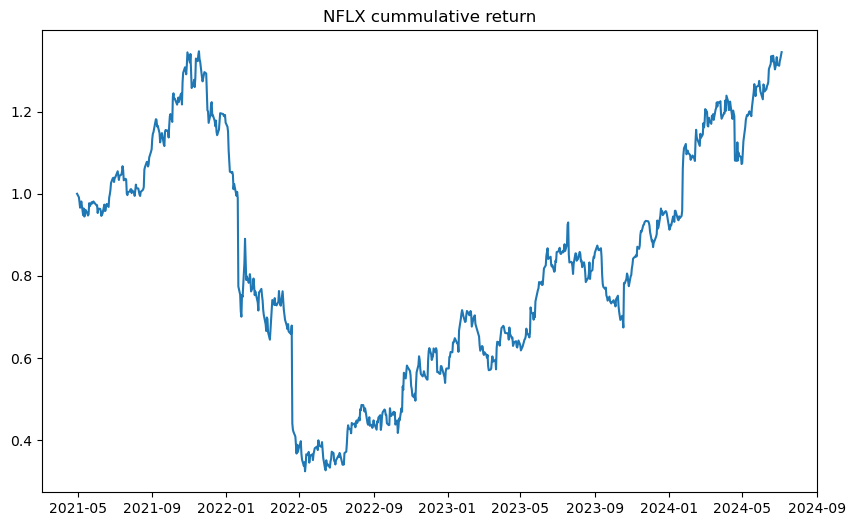

In [5]:
assets = 'NFLX'
period = "800d"
interval="1d"

class Dataset(Dataset):
    def __init__(self, assets, period, interval):
        self.assets = assets
        self.period = period
        self.interval = interval
        self.data = yf.download(self.assets, period=self.period, interval=self.interval)
        self.data['Return'] = self.data['Close'].pct_change().fillna(0)
        self.data['CR'] = (1+self.data['Return']).cumprod()
        
nflx = Dataset(assets, period, interval)

plt.figure(figsize=(10, 6))
plt.plot(nflx.data['CR'])
plt.title('NFLX cummulative return')
plt.show()

[1.         0.99150878 0.97995992 0.96613242 0.97289037 0.9812453
 0.94784511 0.96418489 0.94451485 0.94778669 0.96085462 0.95222706
 0.94704662 0.94981214 0.97701919 0.96965751 0.97941462 0.97637647
 0.97836293 0.98128423 0.97923934 0.97197502 0.97228664 0.95318134
 0.96352273 0.96336696 0.95894608 0.94613127 0.94897466 0.95189596
 0.97355258 0.95799175 0.95898501 0.97053387 0.97526636 0.96792418
 0.99094404 0.99857834 1.00893923 1.02648653 1.03809387 1.03900915
 1.02870674 1.03908701 1.03994393 1.05486211 1.04380013 1.03367293
 1.043839   1.04642925 1.05299243 1.06715104 1.05741337 1.03279652
 1.03663322 1.03423767 1.00031167 0.99668923 1.00377822 1.00588159
 1.01059459 1.01135415 1.00151913 1.00798496 1.00327196 0.99483911
 1.00755644 1.02224092 1.01378857 1.01265897 1.00461576 0.99791624
 0.99464434 1.00477148 1.00866655 1.01059459 1.01635933 1.05889351
 1.06506716 1.07762878 1.0777845  1.06643046 1.07137715 1.08851542
 1.10265454 1.10851663 1.13360087 1.14622085 1.15007705 1.18158

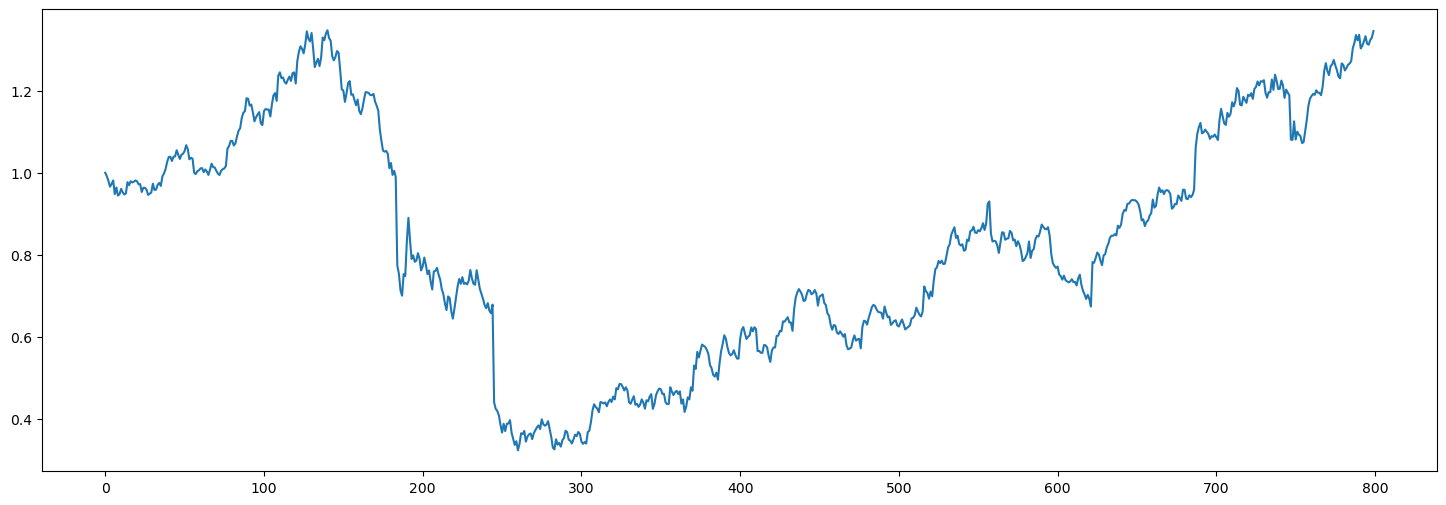

In [6]:
print(nflx.data['CR'].values)
data_ = nflx.data['CR'].values
print(len(data_))
import matplotlib.pylab as plt
plt.figure(figsize=(18,6))
plt.plot(range(len(data_)),data_)
plt.show()

In [7]:
days = data_.shape[0]
train_days = int(0.7*data_.shape[0])
window_size = 30
test_day = days - train_days - window_size
batch_size = 128

In [8]:
def Dataloader_X(datas,T,batch_size,train_days):
    days = datas.shape[0]
    test_days = days - train_days - T

    N_T_data_train = np.array([datas[i:i+T] for i in range(train_days)])
    N_T_data_test = np.array([datas[i:i+T] for i in range(train_days,days-T)])
    A = [torch.tensor(N_T_data_train[i*batch_size:],dtype = torch.float).unsqueeze(2) if i == train_days//batch_size else torch.tensor(N_T_data_train[i*batch_size:(i+1)*batch_size],dtype = torch.float).unsqueeze(2) for i in range(train_days//batch_size+1)]
    print(A[0].size())
    print(A[-1].size())
    B = [torch.tensor(N_T_data_test[i*batch_size:],dtype = torch.float).unsqueeze(2) if i == test_days//batch_size else torch.tensor(N_T_data_test[i*batch_size:(i+1)*batch_size],dtype = torch.float).unsqueeze(2) for i in range(test_days//batch_size+1)]
    print(B[0].size())
    print(B[-1].size())
    return A,B

def Dataloader_Y(datas,T,batch_size,train_days):
    days = datas.shape[0]
    test_days = days - train_days - T
    datas = datas[T:]
    N_T_data_train = np.array([datas[i:i+1] for i in range(train_days)])
    N_T_data_test = np.array([datas[i:i+1] for i in range(train_days,days-T)])
    A = [torch.tensor(N_T_data_train[i*batch_size:],dtype = torch.float) if i == train_days//batch_size else torch.tensor(N_T_data_train[i*batch_size:(i+1)*batch_size],dtype = torch.float) for i in range(train_days//batch_size+1)]
    print(A[0].size())
    print(A[-1].size())
    B = [torch.tensor(N_T_data_test[i*batch_size:],dtype = torch.float) if i == test_days//batch_size else torch.tensor(N_T_data_test[i*batch_size:(i+1)*batch_size],dtype = torch.float) for i in range(test_days//batch_size+1)]
    print(B[0].size())
    print(B[-1].size())
    return A,B

X_train, X_test = Dataloader_X(data_,window_size,batch_size,train_days)
Y_train, Y_test = Dataloader_Y(data_,window_size,batch_size,train_days)

torch.Size([128, 30, 1])
torch.Size([48, 30, 1])
torch.Size([128, 30, 1])
torch.Size([82, 30, 1])
torch.Size([128, 1])
torch.Size([48, 1])
torch.Size([128, 1])
torch.Size([82, 1])


### Training For 3 Models

In [9]:
def train_model(model, train_data, test_data, criterion, optimizer, num_epochs=1000):
    hist_loss = []
    model.train()
    for epoch in range(num_epochs):
        # Forward pass
        outputs = model(train_data)
        loss = criterion(outputs, test_data)
        # Backward and optimize
        optimizer.zero_grad()
        hist_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        if (epoch+1) % 200 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.8f}')
    plt.plot(hist_loss)
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss') 
    plt.show()

In [10]:
models = {'DRNN': model_DRNN, 'LSTM': model_LSTM, 'GRU': model_GRU,}  # Model dictionary
criterion = nn.MSELoss()  
epochs = 5000

for model_name, model in models.items():  # Iterate over variants
    patience = 20
    best_loss = float('inf')
    epochs_no_improve = 0
    criterion = nn.MSELoss()
    optimizer=torch.optim.Adam(model.parameters(), model.lr)
    print(f'Traning Model: {model_name}')
    losses_train = []
    losses_test = []
    for epoch in range(epochs):
        sum = 0
        for x,y in zip(X_train,Y_train):
            pred = model(x)
            loss_train = criterion(pred,y)
            optimizer.zero_grad()
            loss_train.backward()
            optimizer.step()
            sum+=loss_train.item()
        losses_train.append(sum/len(X_train))
        sum = 0
        for x,y in zip(X_test,Y_test):
            pred = model(x)
            loss_test = criterion(pred,y)
            sum+=loss_test.item()
        losses_test.append(sum/len(X_test))
        if (epoch+1) % 500 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {losses_train[-1]:.8f}, Test Loss: {losses_test[-1]:.8f}')
        
        # if losses_test[-1] < best_loss:
        #     best_loss = losses_test[-1]
        #     epochs_no_improve = 0
        # elif epoch>200:
        #     epochs_no_improve += 1
        
        # if epochs_no_improve >= patience:
        #     print(f'Early stopping triggered after epoch {epoch+1}.')
        #     break

    plt.plot(losses_train,label = 'train loss')
    plt.plot(losses_test,label = 'test loss')
    plt.title(model_name+'Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss') 
    plt.legend()
    plt.show()


Traning Model: DRNN
Epoch [500/5000], Train Loss: 0.00323641, Test Loss: 0.00607337
Epoch [1000/5000], Train Loss: 0.00147395, Test Loss: 0.00173482
Epoch [1500/5000], Train Loss: 0.00115677, Test Loss: 0.00106108
Epoch [2000/5000], Train Loss: 0.00091900, Test Loss: 0.00081611
Epoch [2500/5000], Train Loss: 0.00072824, Test Loss: 0.00063670
Epoch [3000/5000], Train Loss: 0.00061497, Test Loss: 0.00053938
Epoch [3500/5000], Train Loss: 0.00055168, Test Loss: 0.00048459
Epoch [4000/5000], Train Loss: 0.00052224, Test Loss: 0.00045544


## Fianl Result

In [ ]:
pred_DRNN = []
pred_LSTM = []
pred_GRU = []
X = X_train
for batch  in X:
    for x in batch:
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
X= X_test
for batch in X:
    for x in batch:
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
print(pred_DRNN)
import matplotlib.pylab as plt
plt.figure(figsize=(18,6))
plt.plot(range(len(data_)),data_,label = 'original')
plt.plot(range(window_size,window_size+len(pred_DRNN[:train_days])),pred_DRNN[:train_days],label = 'DRNN_train')
plt.plot(range(window_size,window_size+len(pred_LSTM[:train_days])),pred_LSTM[:train_days],label = 'LSTM_train')
plt.plot(range(window_size,window_size+len(pred_GRU[:train_days])),pred_GRU[:train_days],label = 'GRU_train')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_DRNN[train_days-1:])),pred_DRNN[train_days-1:],label = 'DRNN_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_LSTM[train_days-1:])),pred_LSTM[train_days-1:],label = 'LSTM_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_GRU[train_days-1:])),pred_GRU[train_days-1:],label = 'GRU_test')
lables = nflx.data.index
step = 150
ticks = range(0,days,step)
plt.xticks(ticks,lables[ticks])
plt.ylabel('cummulated return')
plt.title('stock price vs predict price')
plt.legend()
plt.show()


{'DRNN': Date
2023-03-24    1.025034
2023-03-27    1.022755
2023-03-28    1.009832
2023-03-29    1.036395
2023-03-30    1.056372
                ...   
2024-04-15    2.204032
2024-04-16    2.239358
2024-04-17    2.216535
2024-04-18    2.208376
2024-04-19    2.226321
Length: 271, dtype: float64, 'LSTM': Date
2023-03-24    1.025034
2023-03-27    1.022755
2023-03-28    1.009832
2023-03-29    1.036395
2023-03-30    1.056372
                ...   
2024-04-15    2.287309
2024-04-16    2.299144
2024-04-17    2.310367
2024-04-18    2.317226
2024-04-19    2.320338
Length: 271, dtype: float64, 'GRU': Date
2023-03-24    1.025034
2023-03-27    1.022755
2023-03-28    1.009832
2023-03-29    1.036395
2023-03-30    1.056372
                ...   
2024-04-15    2.205498
2024-04-16    2.216400
2024-04-17    2.226521
2024-04-18    2.230917
2024-04-19    2.229402
Length: 271, dtype: float64}


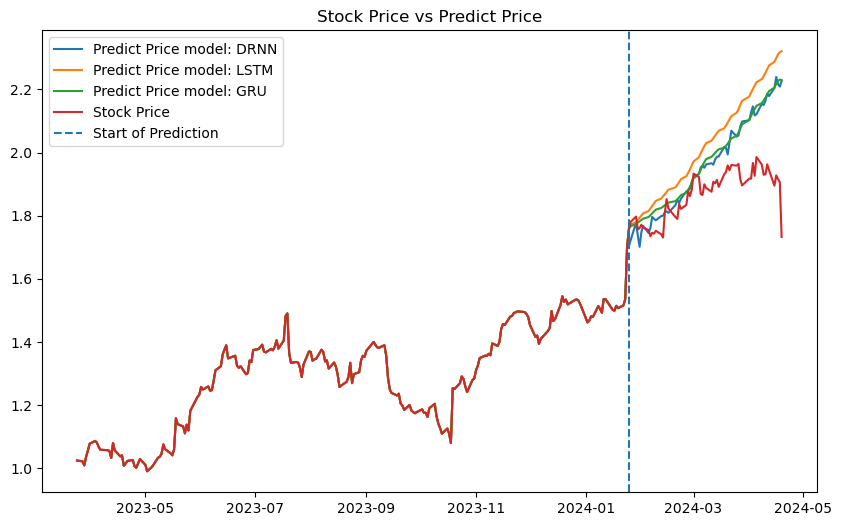

In [ ]:
plt.figure(figsize=(18,6))

plt.plot(range(len(data_[train_days-1+window_size:])),data_[train_days-1+window_size:],label = 'original')
plt.plot(range(len(pred_DRNN[train_days-1:])),pred_DRNN[train_days-1:],label = 'DRNN_test')
plt.plot(range(len(pred_LSTM[train_days-1:])),pred_LSTM[train_days-1:],label = 'LSTM_test')
plt.plot(range(len(pred_GRU[train_days-1:])),pred_GRU[train_days-1:],label = 'GRU_test')
lables = nflx.data.index
step = 50
ticks = range(train_days-1+window_size,days,step)
plt.xticks(range(0,days-(train_days-1+window_size),step),lables[ticks])
plt.ylabel('cummulated return')
plt.title('stock price vs test predict price')
plt.legend()
plt.show()
print(data_.shape[0],len(pred_DRNN))

In [ ]:
pred_DRNN = []
pred_LSTM = []
pred_GRU = []
predict_days = 30
X = X_test[-1][-predict_days-window_size:-predict_days]
for x in X:
    pred = model_DRNN(x).detach().float()
    pred_DRNN.append(pred)

    pred = model_LSTM(x).detach().float()
    pred_LSTM.append(pred)

    pred = model_GRU(x).detach().float()
    pred_GRU.append(pred)
X = X_test[-1][-predict_days]
DRNN_x , LSTM_x,GRU_x = X,X,X
for i in range(predict_days):
    pred = model_DRNN(DRNN_x).detach().float()
    pred_DRNN.append(pred)
    DRNN_x = torch.stack((*DRNN_x[1:],pred),dim=0)

    pred = model_LSTM(LSTM_x).detach().float()
    pred_LSTM.append(pred)
    LSTM_x = torch.stack((*LSTM_x[1:],pred),dim=0)

    pred = model_GRU(GRU_x).detach().float()
    pred_GRU.append(pred)
    GRU_x = torch.stack((*GRU_x[1:],pred),dim=0)

plt.figure(figsize=(18,6))

plt.plot(range(len(data_[-predict_days-window_size:])),data_[-predict_days-window_size:],label = 'original')
plt.plot(range(0,len(pred_DRNN)),pred_DRNN,label = 'DRNN_pred')
plt.plot(range(0,len(pred_LSTM)),pred_LSTM,label = 'LSTM_pred')
plt.plot(range(0,len(pred_GRU)),pred_GRU,label = 'GRU_pred')
lables = nflx.data.index
step = 50
ticks = range(days-predict_days-window_size,days,step)
plt.xticks(range(0,predict_days+window_size,step),lables[ticks])
plt.ylabel('cummulated return')
plt.title('stock price vs test predict price(predict 30 days)')
plt.legend()
plt.show()

In [ ]:
pred_DRNN = []
pred_LSTM = []
pred_GRU = []
dummy_size = 29 # < window_size
X = X_train
for batch  in X:
    for x in batch:
        dummy = torch.ones((dummy_size,1))
        x = torch.stack((*dummy,*x[dummy_size-window_size:]),dim=0)
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
X= X_test
for batch in X:
    for x in batch:
        dummy = torch.ones((dummy_size,1))
        x = torch.stack((*dummy,*x[dummy_size-window_size:]),dim=0)
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
print(pred_DRNN)
import matplotlib.pylab as plt
plt.figure(figsize=(18,6))
plt.plot(range(len(data_)),data_,label = 'original')
plt.plot(range(window_size,window_size+len(pred_DRNN[:train_days])),pred_DRNN[:train_days],label = 'DRNN_train')
plt.plot(range(window_size,window_size+len(pred_LSTM[:train_days])),pred_LSTM[:train_days],label = 'LSTM_train')
plt.plot(range(window_size,window_size+len(pred_GRU[:train_days])),pred_GRU[:train_days],label = 'GRU_train')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_DRNN[train_days-1:])),pred_DRNN[train_days-1:],label = 'DRNN_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_LSTM[train_days-1:])),pred_LSTM[train_days-1:],label = 'LSTM_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_GRU[train_days-1:])),pred_GRU[train_days-1:],label = 'GRU_test')
lables = nflx.data.index
step = 150
ticks = range(0,days,step)
plt.xticks(ticks,lables[ticks])
plt.ylabel('cummulated return')
plt.title('stock price vs predict price')
plt.legend()
plt.show()


In [ ]:
pred_DRNN = []
pred_LSTM = []
pred_GRU = []
dummy_size = 29 # < window_size
X = X_train
for batch  in X:
    for x in batch:
        dummy = torch.ones((dummy_size,1))
        x = x[-2:]
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
X= X_test
for batch in X:
    for x in batch:
        dummy = torch.ones((dummy_size,1))
        x = x[-2:]
        pred = model_DRNN(x).detach().float()
        pred_DRNN.append(pred)
        pred = model_LSTM(x).detach().float()
        pred_LSTM.append(pred)
        pred = model_GRU(x).detach().float()
        pred_GRU.append(pred)
print(pred_DRNN)
import matplotlib.pylab as plt
plt.figure(figsize=(18,6))
plt.plot(range(len(data_)),data_,label = 'original')
plt.plot(range(window_size,window_size+len(pred_DRNN[:train_days])),pred_DRNN[:train_days],label = 'DRNN_train')
plt.plot(range(window_size,window_size+len(pred_LSTM[:train_days])),pred_LSTM[:train_days],label = 'LSTM_train')
plt.plot(range(window_size,window_size+len(pred_GRU[:train_days])),pred_GRU[:train_days],label = 'GRU_train')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_DRNN[train_days-1:])),pred_DRNN[train_days-1:],label = 'DRNN_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_LSTM[train_days-1:])),pred_LSTM[train_days-1:],label = 'LSTM_test')
plt.plot(range(window_size+train_days-1,window_size+train_days-1+len(pred_GRU[train_days-1:])),pred_GRU[train_days-1:],label = 'GRU_test')
lables = nflx.data.index
step = 150
ticks = range(0,days,step)
plt.xticks(ticks,lables[ticks])
plt.ylabel('cummulated return')
plt.title('stock price vs predict price')
plt.legend()
plt.show()


## Reference

[R1] https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks\
[R2] https://d2l.ai/chapter_recurrent-neural-networks/index.html